In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn as sns

In [9]:
df_train = pd.read_csv('dataset_train.csv', index_col='Index')

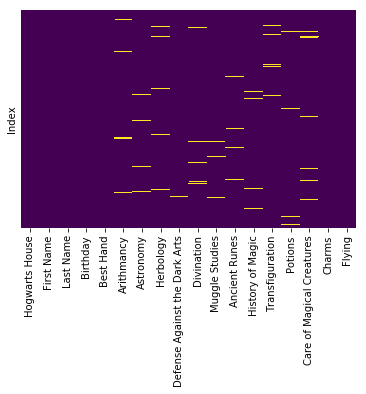

In [10]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
sns.countplot(x='house_int', hue='year', data=model_df.numeric_df)

NameError: name 'model_df' is not defined

In [12]:
df_train['year'] = df_train['Birthday'].apply(lambda x: int(x.split('-')[0]))
df_train['year'] = df_train['year'] - df_train['year'].min()
df_train.head()

Hogwarts House First Name  Last Name    Birthday Best Hand  Arithmancy  \
Index                                                                          
0          Ravenclaw     Tamara        Hsu  2000-03-30      Left     58384.0   
1          Slytherin      Erich    Paredes  1999-10-14     Right     67239.0   
2          Ravenclaw   Stephany      Braun  1999-11-03      Left     23702.0   
3         Gryffindor      Vesta  Mcmichael  2000-08-19      Left     32667.0   
4         Gryffindor     Gaston      Gibbs  1998-09-27      Left     60158.0   

        Astronomy  Herbology  Defense Against the Dark Arts  Divination  \
Index                                                                     
0     -487.886086   5.727180                       4.878861       4.722   
1     -552.060507  -5.987446                       5.520605      -5.612   
2     -366.076117   7.725017                       3.660761       6.140   
3      697.742809  -6.497214                      -6.977428       4.026   
4      436.775204  -7.820623                            NaN       2.236   

       Muggle Studies  Ancient Runes  History of Magic  Transfiguration  \
Index                                                                     
0          272.035831     532.484226          5.231058      1039.788281   
1         -487.340557     367.760303          4.107170      1058.944592   
2          664.893521     602.585284          3.555579      1088.088348   
3         -537.001128     523.982133         -4.809637       920.391449   
4         -444.262537     599.324514         -3.444377       937.434724   

        Potions  Care of Magical Creatures     Charms  Flying  year  
Index                                                                
0      3.790369                   0.715939 -232.79405  -26.89     4  
1      7.248742                   0.091674 -252.18425 -113.45     3  
2      8.728531                  -0.515327 -227.34265   30.42     3  
3      0.821911                  -0.014040 -256.84675  200.64     4  
4      4.311066                  -0.264070 -256.38730  157.98     2

In [13]:
houses = df_train['Hogwarts House'].unique().tolist()
def classify_house(house_name):
    return houses.index(house_name)

hands = df_train['Best Hand'].unique().tolist()
def classify_hand(hand_name):
    return hands.index(hand_name)

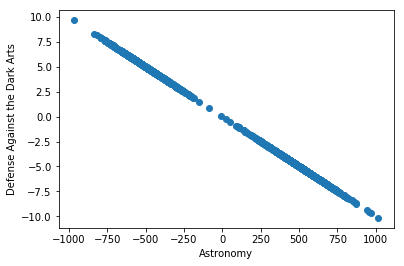

In [14]:
plt.scatter(df_train['Astronomy'], df_train['Defense Against the Dark Arts'])
plt.xlabel('Astronomy')
plt.ylabel('Defense Against the Dark Arts')
plt.show()

# Create scatter (pair plot) plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12add4160>,
      dtype=object)

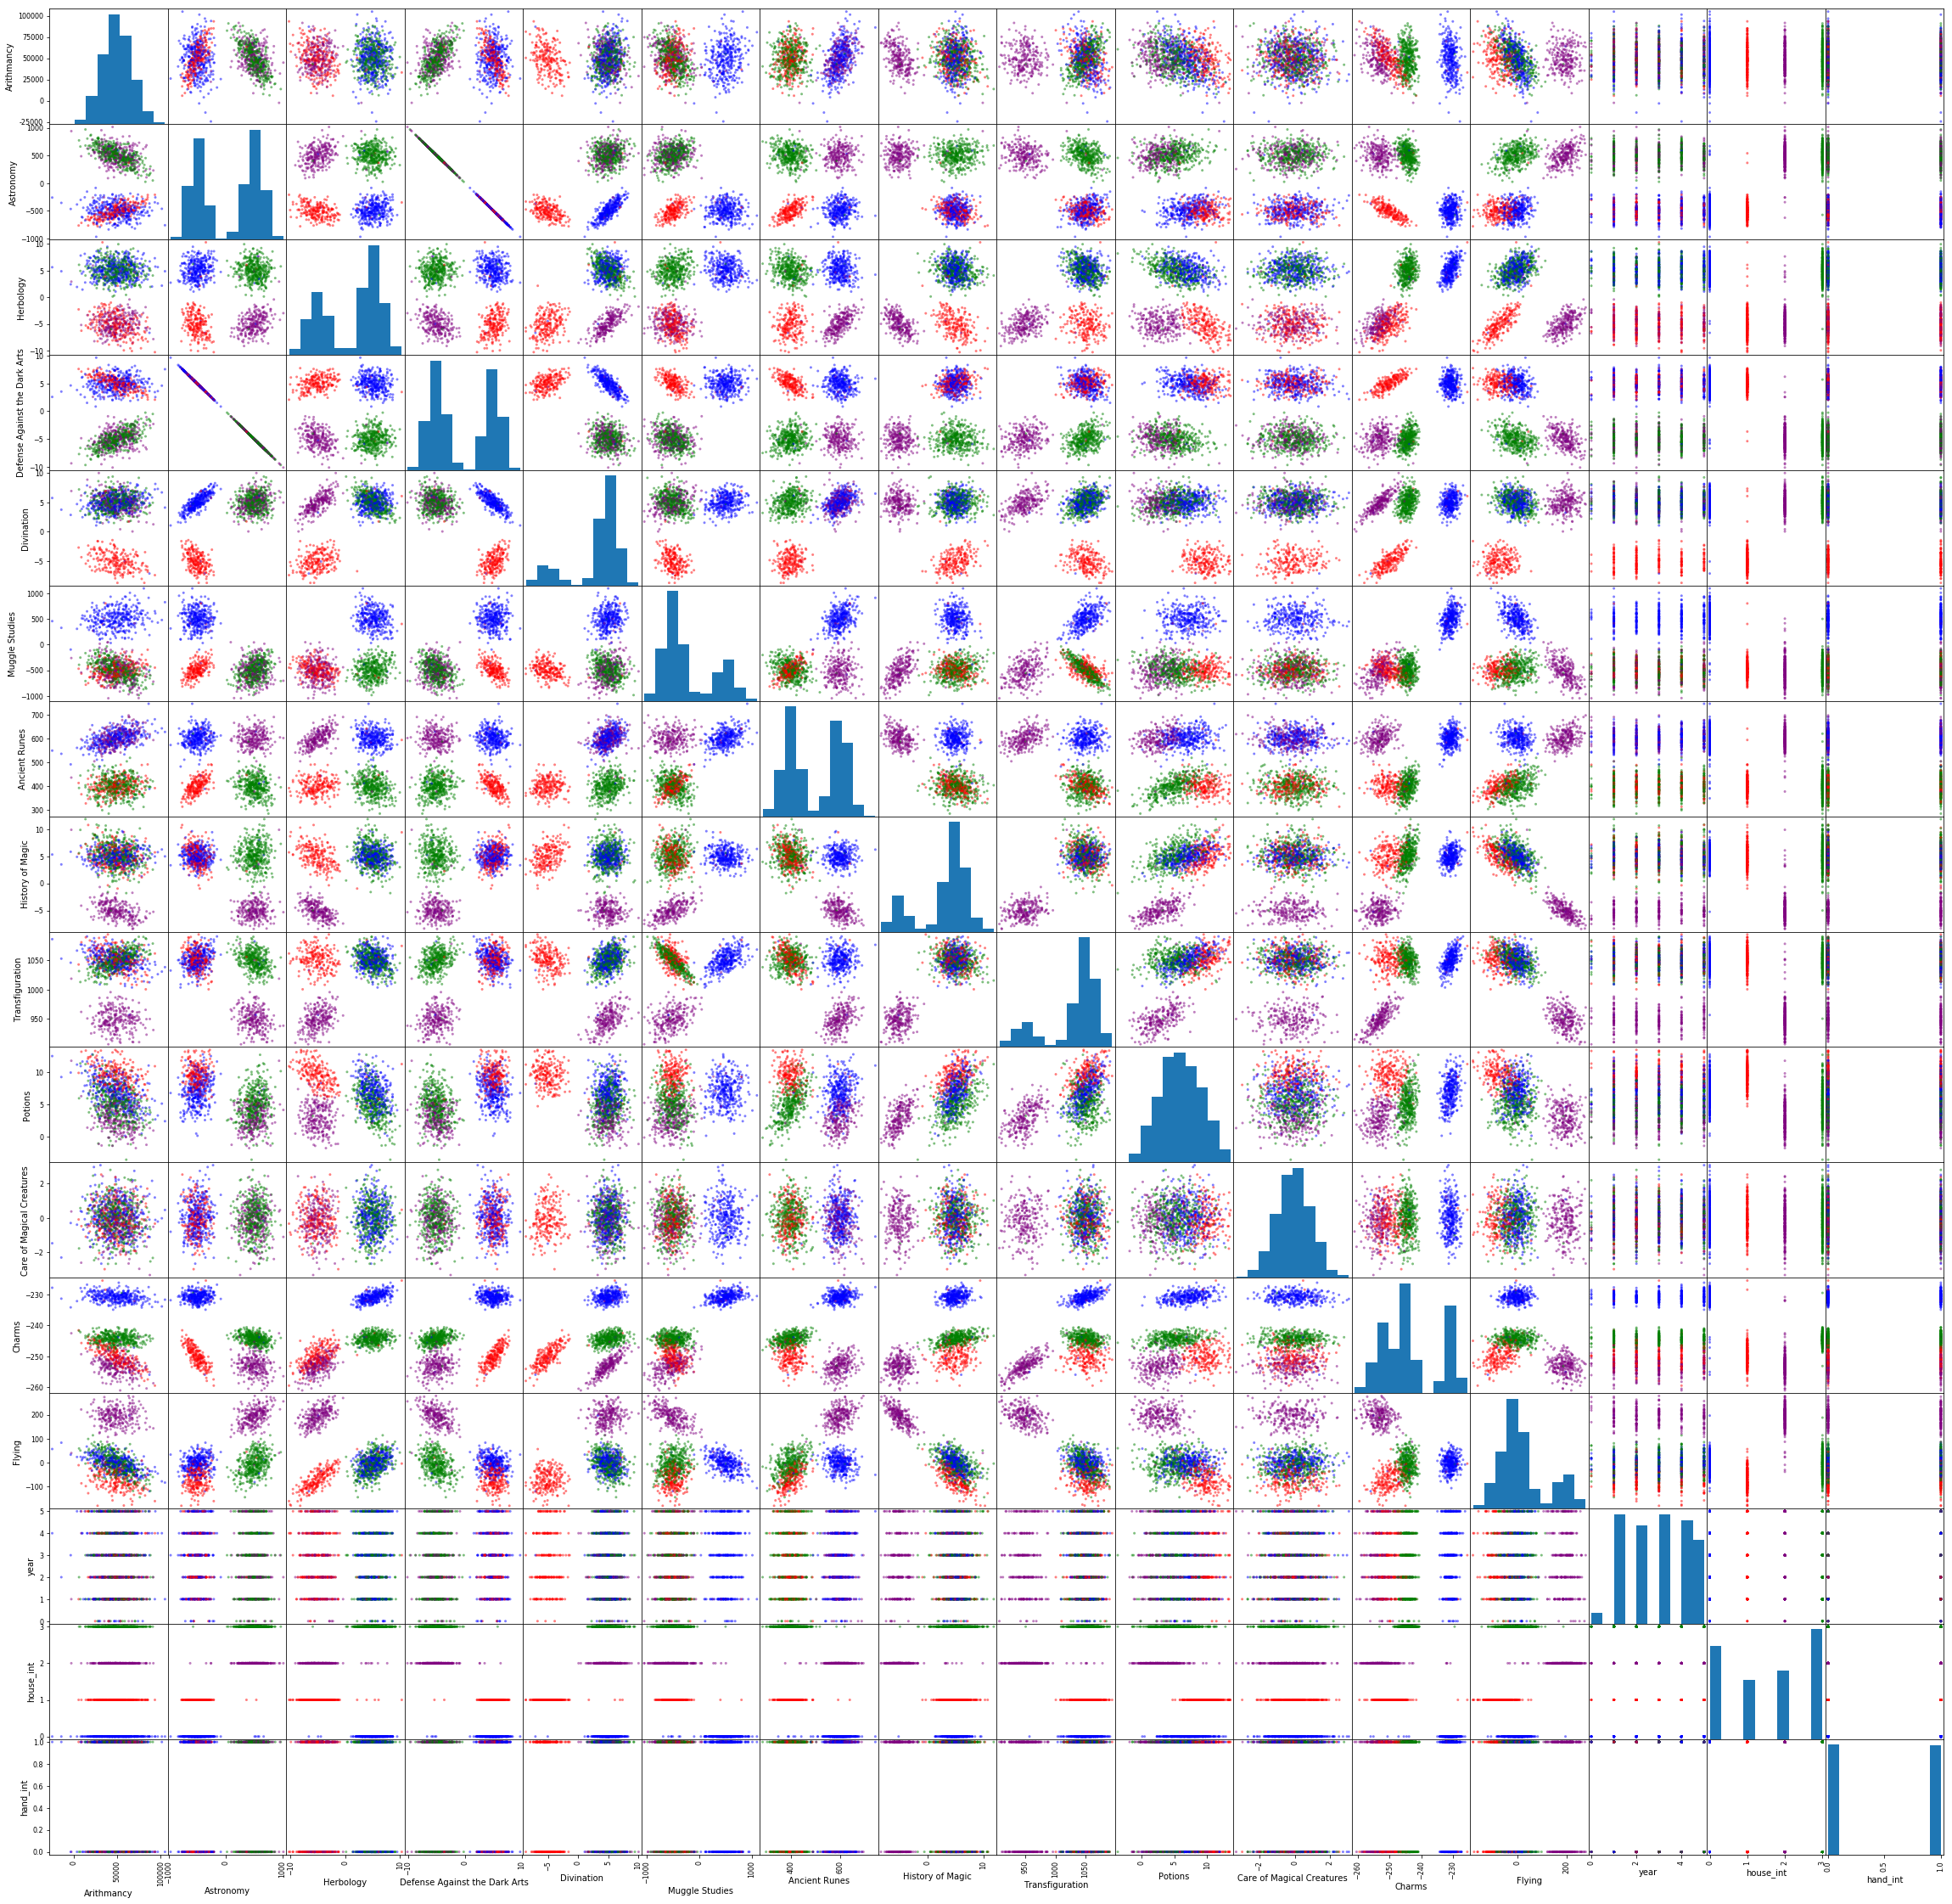

In [15]:
df_train['house_int'] = df_train['Hogwarts House'].apply(classify_house)
df_train['hand_int'] = df_train['Best Hand'].apply(classify_hand)
plot_df = df_train._get_numeric_data().dropna(how='any', inplace=False)


colors_dict = {0: 'blue', 1: 'red', 2: 'purple', 3: 'green'}
colors = plot_df['house_int'].map(lambda x: colors_dict.get(x))
pd.plotting.scatter_matrix(plot_df, figsize=(40,40), color=colors)

### Looking to the scatter plot above we can make next decissions:
    1. Astronomy and Defence Against the Dark Arts have strong correlation. So we have to use only one of this features.
    2. Arithmacy and Care of Magical Creatures don't infuence on separating students between houses. So we don't need to use this features in our model.
    3. I'm not very confident about indluence of "Hand" feature. Try to build model with this feature and without it.

In [16]:
def plot_cource_distribution(df):
    fig, axes = plt.subplots()
    years = df['year'].unique()
    for year in years:
        one_year_df = df[df['year'] == year]
        plt.bar(one_year_df['Hogwarts House'], one_year_df['First Name'])
        plt.title('Course-' + str(year))
        plt.xlabel('Houses')
        plt.ylabel('Students')
        plt.show()

In [17]:
plot_cource_distribution(cources_df)

NameError: name 'cources_df' is not defined